# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр.0381 Березовская Валерия и Котов Дмитрий. Вариант №9

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Дискретный фильтр** $-$ любой фильтр, обрабатывающий цифровой сигнал с целью выделения и/или подавления определённых частот этого сигнала.

Cвойства:
1. линейность
2. стационарность

Дискретный сигнал:

$s(t) = \displaystyle\sum_{k=-\infty}^{\infty} x_kδ(t-k)$

Спектр дискретного сигнала:

$S(\omega)=\displaystyle\sum_{k=-\infty}^{\infty}x_k e^{-i\omega k}$

Дискретное преобразование Фурье(ДПФ):

$X(n) = \displaystyle\sum_{k=0}^{N-1} x_ke^{-i\frac{2πn}{N}k}, k ∈ [0, N-1]$

Сглаживание входного сигнала - приближение сигнала $s(t)$ функцией $y(t)$ по $N$ точкам:

 $\displaystyle\sum_{k-0}^N(s_k-y_k)^2 \rightarrow  min$


## Постановка задачи:

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения:

1. Сформировать дискретный сигнал посредством дискретизации с шагом
T = 1  непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(ω_kt+φ_k)$. Частота каждой из гармоник не должна превышать π. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до π, изменяющимися с шагом $Δω=0.1π$. Амплитуды гармоник
$A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета (N=31).
2. Визуализировать исходные аналоговый и дискретизированный сигналы.
3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ – передаточной функции (частотной характеристики) фильтра.
5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.
6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.
7. Проанализировать результат на соответствие значениям H(ω).Сделать выводы.
8. Повторить п. 4–7 для следующих фильтров: Сглаживание полиномом 2-ой степени по 5 и 9 узлам.Сглаживание полиномом 4-ой степени по 7 и 11 узлам.
9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

## Выполнение работы


#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом T = 1  непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_kcos(ω_kt+φ_k)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

Для дальнейшей дискретизации необходимо задать  аналоговый:

$s(t) = \displaystyle\sum_{k}A_kcos(ω_kt+ϕ_k)$, где $A_k∈[1,11], ϕ_k - \text{случайная величина от 0 до 0.5, а } ω_k \text{ изменяется } Δω = 0.1π$

In [ ]:
def analog_signal(t):
    omega_values = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
    amplitudes = np.random.randint(1, 12, len(omega_values))
    amplitudes = amplitudes / np.sum(amplitudes)
    phases = np.random.uniform(0, 0.5, len(omega_values))

    signal = np.zeros_like(t, dtype=np.float64)
    for i in range(len(omega_values)):
        signal += amplitudes[i] * np.cos(omega_values[i] * t + phases[i])

    return signal

t_analog = np.linspace(0, 32, 1000)

analog = analog_signal(t_analog)

t_discrete = np.arange(0, 32)

discrete = analog_signal(t_discrete)

#### 2. Визуализация исходных аналоговый и дискретизированных сигналов на интервале $k \in [0;31]$:

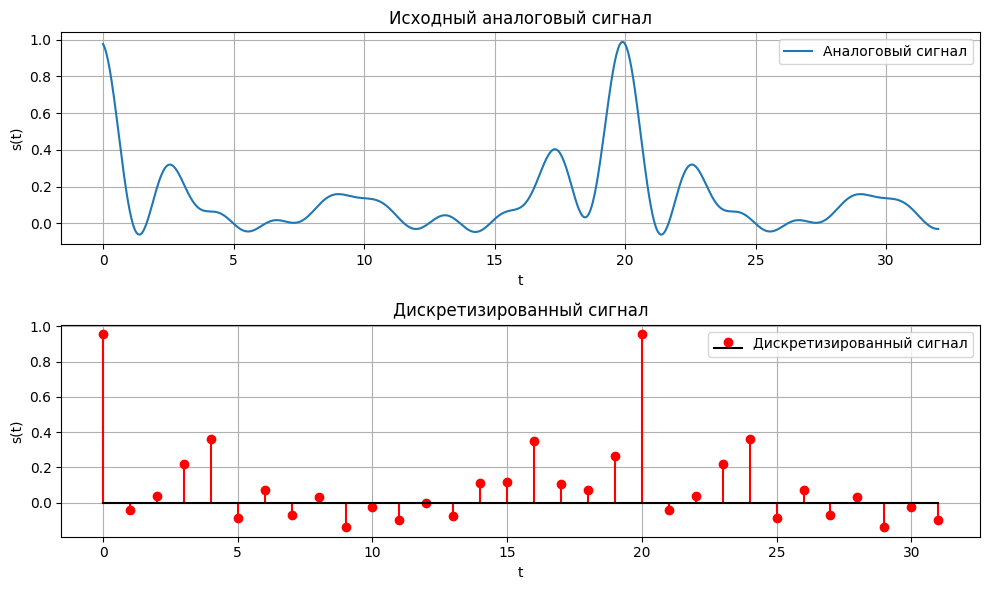

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_analog, analog, label='Аналоговый сигнал')
plt.title('Исходный аналоговый сигнал')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(t_discrete, discrete, markerfmt='ro', linefmt='r-', basefmt='k-', label='Дискретизированный сигнал')
plt.title('Дискретизированный сигнал')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. Нахождение дискретных отсчётов спектра с помощью ДПФ. Визуализация спектра.

Дискретный сигнал можно представить как

$s(t) = \displaystyle\sum_{k}x_kδ(t-k)$

Используя ДПФ, спектр можно записать в следующем виде:

$s(w) = \displaystyle\sum_{k}x_ke^{-i\omega k}$

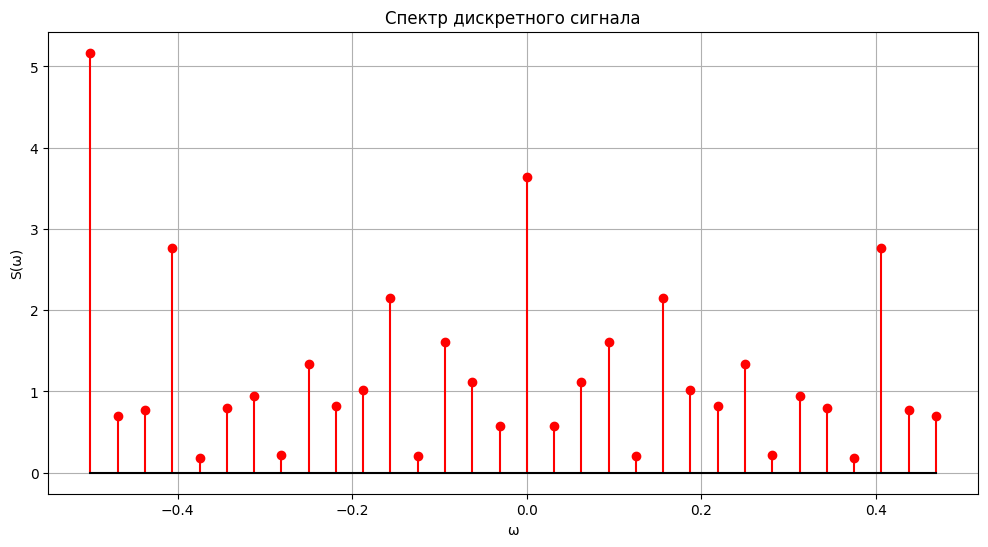

In [30]:
# Применение ДПФ к дискретному сигналу
spectrum = np.fft.fft(discrete)

# Вычисление частот для оси частот
frequencies = np.fft.fftfreq(len(spectrum))

# Визуализация спектра дискретного сигнала
plt.figure(figsize=(12, 6))
plt.stem(frequencies, np.abs(spectrum), markerfmt='ro', linefmt='r-', basefmt='k-')
plt.title('Спектр дискретного сигнала')
plt.xlabel('ω')
plt.ylabel('S(ω)')
plt.grid(True)
plt.show()

#### 4. Линейное сглаживание по 5-ти и 9-ти точкам

Линейное сглаживание по 5-ти точкам:

$y_n=\frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$

Передаточная функция:

$H(\omega) = \frac{2\cos(\omega)+2\cos(2\omega)+1}{5}$

Линейное сглаживание по 9-ти точкам:

$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$

Передаточная функция:

$H(\omega)=\frac{1+2\cos(\omega)+2\cos(2\omega)+2\cos(3\omega)+2\cos(4\omega)}{9}$


In [ ]:
def linear_smoothing_5(set_y):
    return np.convolve(set_y, np.ones(5), 'same') / 5

def linear_smoothing_9(set_y):
    return np.convolve(set_y, np.ones(9), 'same') / 9

sm_discrete_y5 = linear_smoothing_5(discrete)
sm_discrete_y9 = linear_smoothing_9(discrete)

#### 5. Визуализация полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

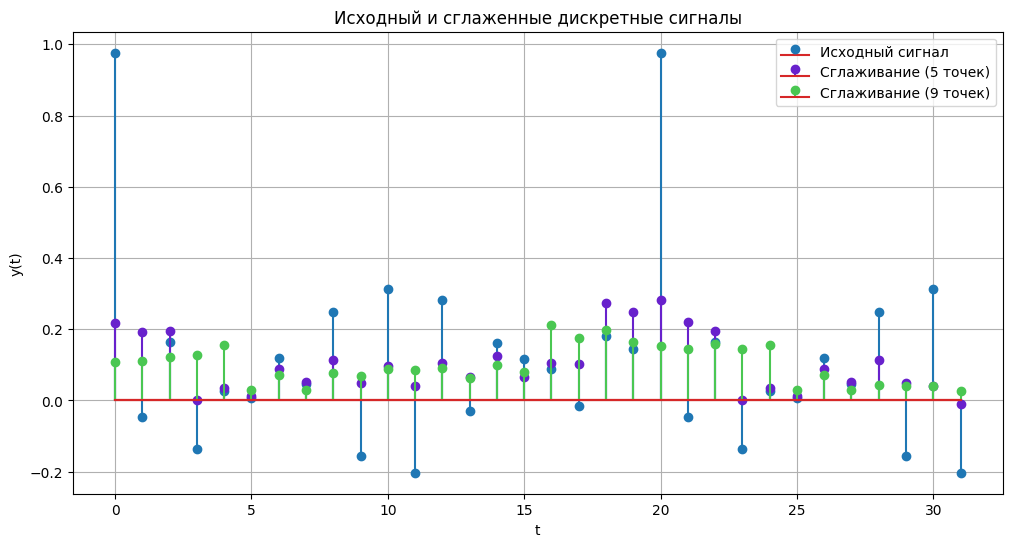

In [29]:
plt.figure(figsize=(12, 6))

# Исходный дискретный сигнал
plt.stem(t_discrete, discrete, label='Исходный сигнал')

# Сглаженные сигналы
plt.stem(t_discrete, sm_discrete_y5, label='Сглаживание (5 точек)', linefmt="#6821cc")
plt.stem(t_discrete, sm_discrete_y9, label='Сглаживание (9 точек)', linefmt="#4ac752")

plt.title('Исходный и сглаженные дискретные сигналы')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()


#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

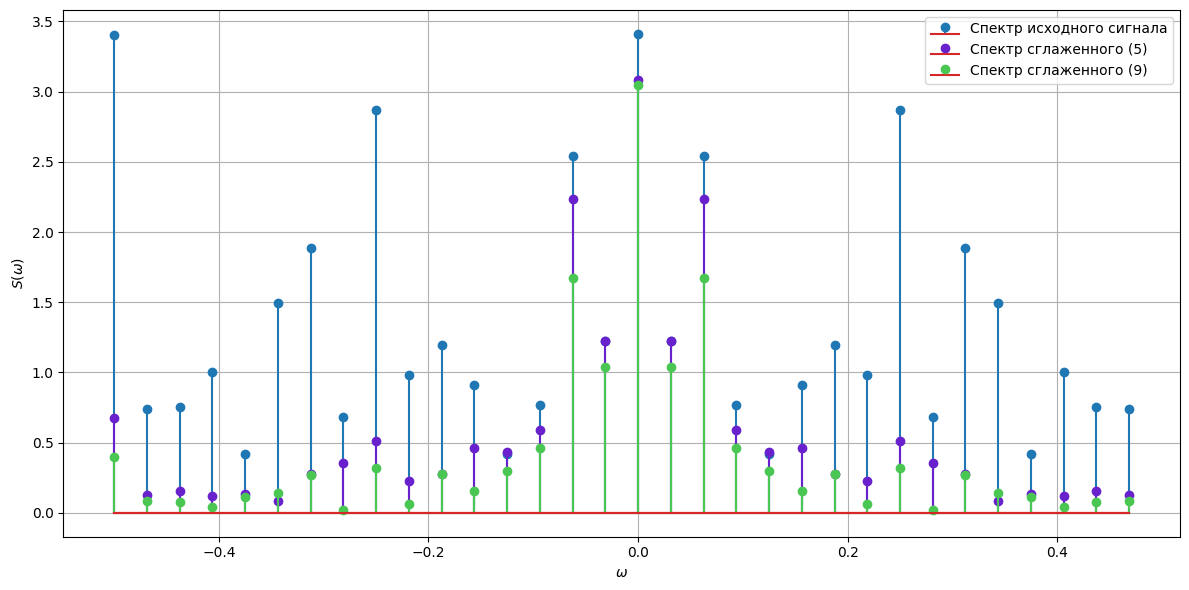

In [ ]:
discrete_spectrum = np.fft.fft(discrete)
smoothed_spectrum_5 = np.fft.fft(sm_discrete_y5)
smoothed_spectrum_9 = np.fft.fft(sm_discrete_y9)

# Получите частотную ось для визуализации спектра
frequency_axis = np.fft.fftfreq(len(discrete))

# Визуализация спектров исходного и сглаженного сигналов
plt.figure(figsize=(12, 6))

# Сглаженный сигнал
plt.stem(frequency_axis, np.abs(discrete_spectrum), label='Спектр исходного сигнала')
plt.stem(frequency_axis, np.abs(smoothed_spectrum_5), label='Спектр сглаженного (5)', linefmt="#6821cc")
plt.stem(frequency_axis, np.abs(smoothed_spectrum_9), label='Спектр сглаженного (9)', linefmt="#4ac752")
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 7. Анализ на соответствие с H(ω).

Из графиков видно, что изменение значений дискреных отсчётов согласуется со значениями предаточных функций.


На основе графиков можно сделать вывод, что в 0 сигнал после фильтрации подавляется хуже, чем частотной области, находящейся достаточно далеко от 0. Это происходит из-за того, сигнал непостоянный и величина  подавления != 0.

#### 8. Повтор п. 4–7



*   Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
*   Сглаживание полиномом 4-ой степени по 7 и 11 узлам.



##### **Сглаживание полиномом 2-ой степени по 5 и 9 узлам:**

п.4 Применение линейного сглаживания полиномом 2-ой степени по 5 и 9 узлам для дискретного сигнала.

Сглаживание по 5-ти точкам:

$y_n = \frac{-3s_{n-2} + 12s_{n-1} + 17s_{n} +12s_{n+1} - 3s_{n+2}}{35}$

Передаточная функция:

$H(\omega) = \frac{17 + 24\cos\omega - 6\cos{2\omega}}{35}$

Сглаживание по 9-ти точкам:

$y_n = \frac{-21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_n + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4}}{231}$

Передаточная функция:

$H(\omega)=\frac{59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega)}{231}$

In [ ]:
def quadratic_smoothing(set_y, num_points):
    smoothed_signal = np.zeros(len(set_y))

    for i in range(len(set_y)):
        if i < num_points // 2 or i >= len(set_y) - num_points // 2:
            smoothed_signal[i] = set_y[i]
        else:
            subset = set_y[i - num_points // 2:i + num_points // 2 + 1]
            p = np.polyfit(np.arange(len(subset)), subset, 2)
            smoothed_signal[i] = np.polyval(p, num_points // 2)
    return smoothed_signal

smoothed_quadro_signal_5 = quadratic_smoothing(discrete, 5)
smoothed_quadro_signal_9 = quadratic_smoothing(discrete, 9)

 п.5 Визуализация дискретного сигнала после фильтрации с помощью квадратичного сглаживания.

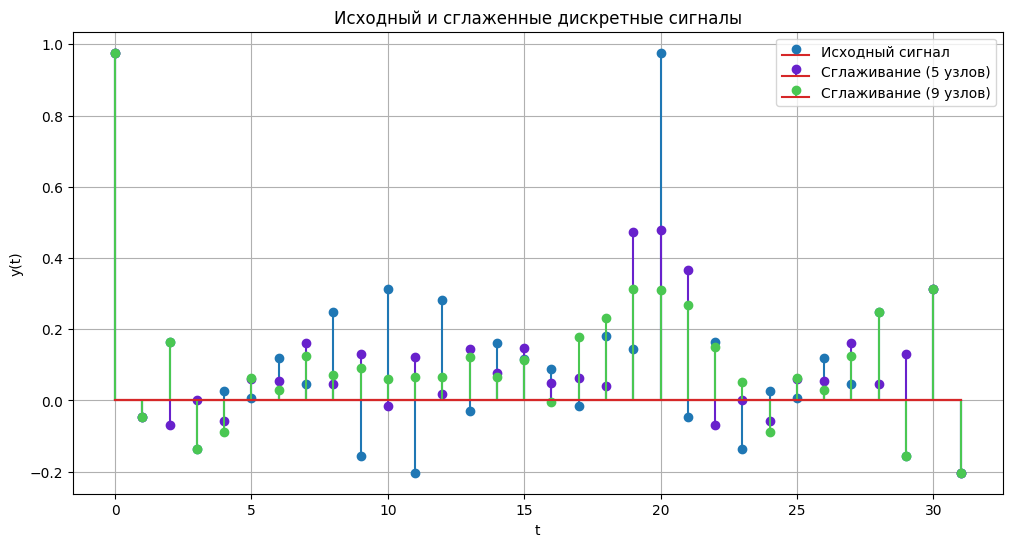

In [28]:
plt.figure(figsize=(12, 6))

# Исходный дискретный сигнал
plt.stem(t_discrete, discrete, label='Исходный сигнал')

# Сглаженные сигналы
plt.stem(t_discrete, smoothed_quadro_signal_5, label='Сглаживание (5 узлов)', linefmt="#6821cc")
plt.stem(t_discrete, smoothed_quadro_signal_9, label='Сглаживание (9 узлов)', linefmt="#4ac752")

plt.title('Исходный и сглаженные дискретные сигналы')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()


п.6 Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.

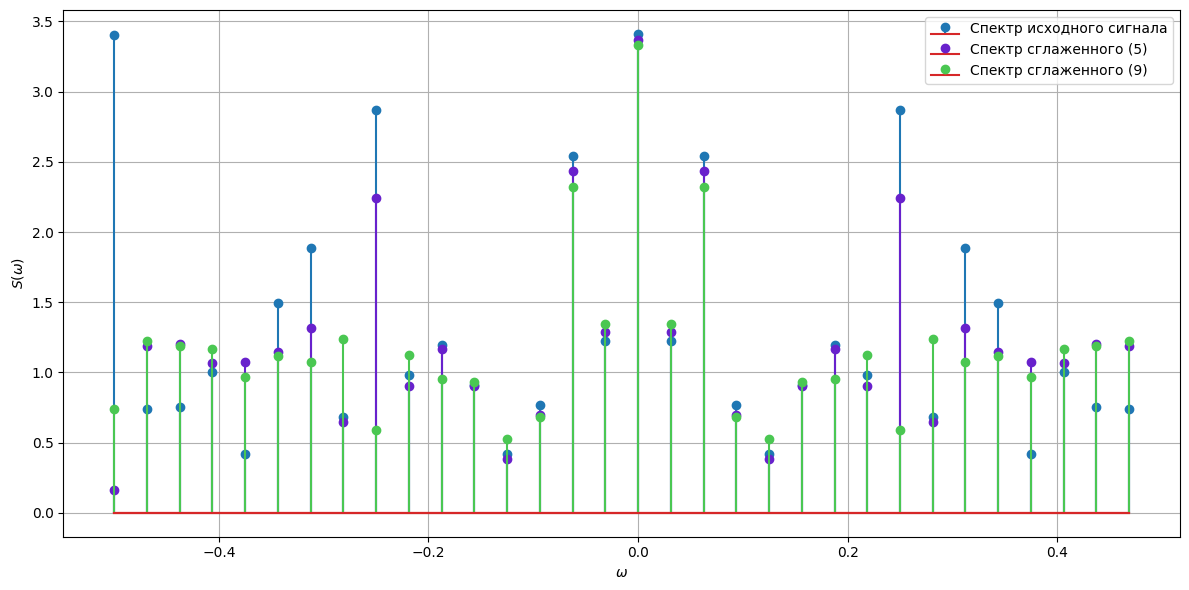

In [ ]:
smoothed_quadro_spectrum_5 = np.fft.fft(smoothed_quadro_signal_5)
smoothed_quadro_spectrum_9 = np.fft.fft(smoothed_quadro_signal_9)

frequency_axis = np.fft.fftfreq(len(discrete))

plt.figure(figsize=(12, 6))

# Сглаженный сигнал
plt.stem(frequency_axis, np.abs(discrete_spectrum), label='Спектр исходного сигнала')
plt.stem(frequency_axis, np.abs(smoothed_quadro_spectrum_5), label='Спектр сглаженного (5)', linefmt="#6821cc")
plt.stem(frequency_axis, np.abs(smoothed_quadro_spectrum_9), label='Спектр сглаженного (9)', linefmt="#4ac752")
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

п.7 Анализ

Есть зависимость от количества точек и размера полосы пропускания: при 5 точках полоса не такая маленькая, как при 9.Следовательно, тем лучше подавляются высокие частоты. Однако в 0 картина отличается - можно наблюдать высокое пропускание сигнала.

Из графиков видно, что изменение значений дискреных отсчётов согласуется со значениями предаточных функций.

##### Сглаживание полиномом 4-ой степени по 7 и 11 узлам:

п.4 Применение линейного сглаживания полиномом 4-ой степени по 7 и 11 узлам для дискретного сигнала.

Сглаживание по 7-ти точкам:

$y_n = \frac{5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_n + 75s_{n+1} - 30s_{n+2} + 5s_{n+3}}{231}$

Передаточная функция:

$H(\omega) = \frac{131 + 150\cos(\omega) - 60\cos(2\omega) + 10\cos(3\omega)}{231}$

Сглаживание по 11-ти точкам:

$y_n = \frac{18s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_n + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n+5}}{429}$

Передаточная функция:

$H(\omega) = \frac{143 + 240 \cos(\omega) + 120 \cos(2\omega) − 20 \cos(3\omega) - 90 \cos(4\omega) + 36 \cos(5\omega)}{429}$

In [ ]:
def quartic_smoothing(set_y, num_points):
    smoothed_signal = np.zeros(len(set_y))

    for i in range(len(set_y)):
        if i < num_points // 2 or i >= len(set_y) - num_points // 2:
            smoothed_signal[i] = set_y[i]
        else:
            subset = set_y[i - num_points // 2:i + num_points // 2 + 1]
            p = np.polyfit(np.arange(len(subset)), subset, 4)
            smoothed_signal[i] = np.polyval(p, num_points // 2)
    return smoothed_signal

smoothed_signal_7 = quartic_smoothing(discrete, 7)
smoothed_signal_11 = quartic_smoothing(discrete, 11)

 п.5 Визуализация дискретного сигнала после фильтрации с помощью квадратичного сглаживания.

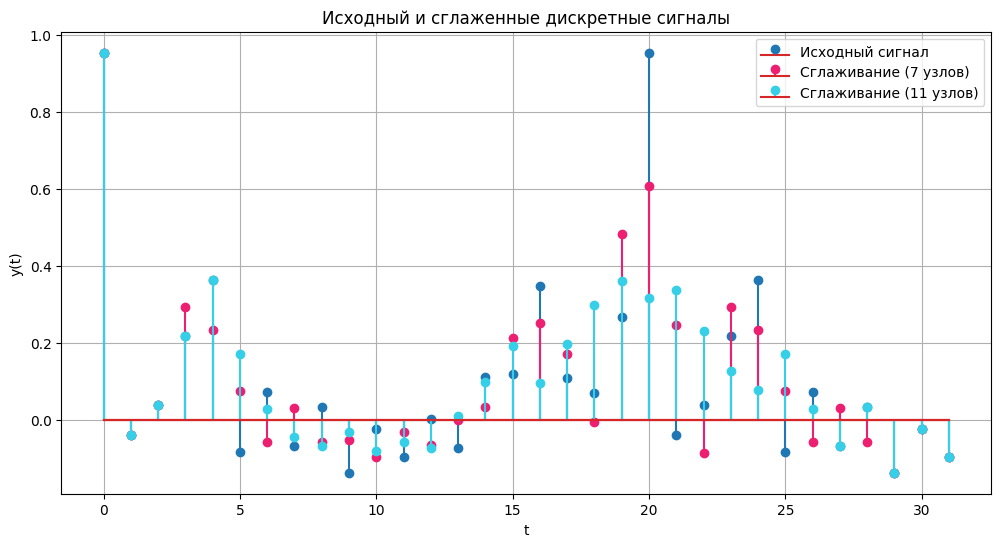

In [ ]:
plt.figure(figsize=(12, 6))

# Исходный дискретный сигнал
plt.stem(t_discrete, discrete, label='Исходный сигнал')

# Сглаженные сигналы
plt.stem(t_discrete, smoothed_signal_7, label='Сглаживание (7 узлов)', linefmt="#ed1f71")
plt.stem(t_discrete, smoothed_signal_11, label='Сглаживание (11 узлов)', linefmt="#35d0e8")

plt.title('Исходный и сглаженные дискретные сигналы')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()


п.6 Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.

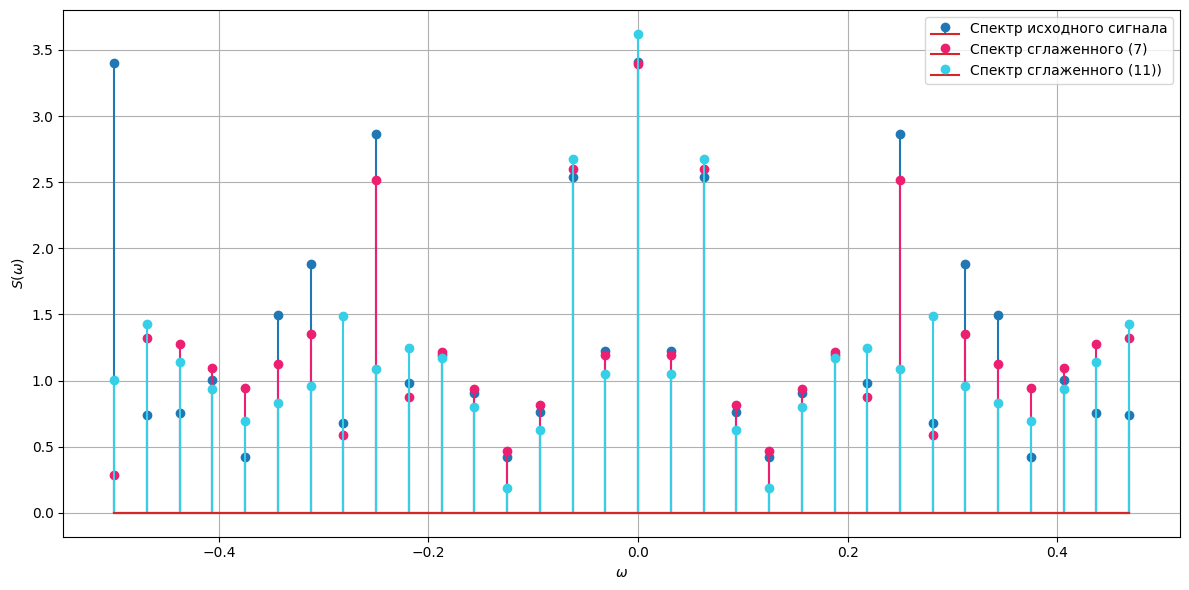

In [ ]:
smoothed_spectrum_7 = np.fft.fft(smoothed_signal_7)
smoothed_spectrum_11 = np.fft.fft(smoothed_signal_11)

frequency_axis = np.fft.fftfreq(len(discrete))

# Визуализация спектров исходного и сглаженного сигналов
plt.figure(figsize=(12, 6))

# Сглаженный сигнал
plt.stem(frequency_axis, np.abs(discrete_spectrum), label='Спектр исходного сигнала')
plt.stem(frequency_axis, np.abs(smoothed_spectrum_7), label='Спектр сглаженного (7)', linefmt="#ed1f71")
plt.stem(frequency_axis, np.abs(smoothed_spectrum_11), label='Спектр сглаженного (11))', linefmt="#35d0e8")
plt.xlabel('$\omega$')
plt.ylabel('$S(\omega)$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

п.7 Анализ

Как было замечено ранее есть зависимость от количества точек и размера полосы пропускания. При использовании 11 точек фильтрация происходит лучше, чем при 7. В 0 так же, как и предыдущих случаях протсходит пропускание сигнала, вызванное непостоянностью самого сигнала.

Из графиков видно, что изменение значений дискреных отсчётов согласуется со значениями предаточных функций $H(\omega)$.

## Выводы

В ходе выполнения практической работы:

1. Создан дискретный сигнал путем дискретизации непрерывного аналогового сигнала, представляющего собой линейную комбинацию гармонических функций.

2. С использованием ДПФ были получены дискретные отсчеты спектра для исследуемого дискретного сигнала, а затем проведён анализ на сходство с передаточной функцией.

3. Были изучены способы фильтрации дискретных сигналов с использованием полиномиальных фильтров.

4. Были проведены сравнения спектров модифицированных сигналов после применения различных методов фильтрации, таких как линейное сглаживание  и полиномиальное второй и четвертой степени с разным количеством точек.

5. Были обнаружены схожие зависимости между степенью сглаживающего полинома и количеством используемых точек, влияющие на спектры модифицированных сигналов.

